In [1]:
!pip install yfinance

In [9]:

import yfinance as yf

# 삼성전자의 주가 데이터를 가져옵니다.
data = yf.download('005930.KS', start='2020-08-11', end='2023-08-11')


[*********************100%***********************]  1 of 1 completed


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 908 entries, 2020-01-02 to 2023-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       908 non-null    float64
 1   High       908 non-null    float64
 2   Low        908 non-null    float64
 3   Close      908 non-null    float64
 4   Adj Close  908 non-null    float64
 5   Volume     908 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 49.7 KB


22/22 [==============================] - 1s 20ms/step


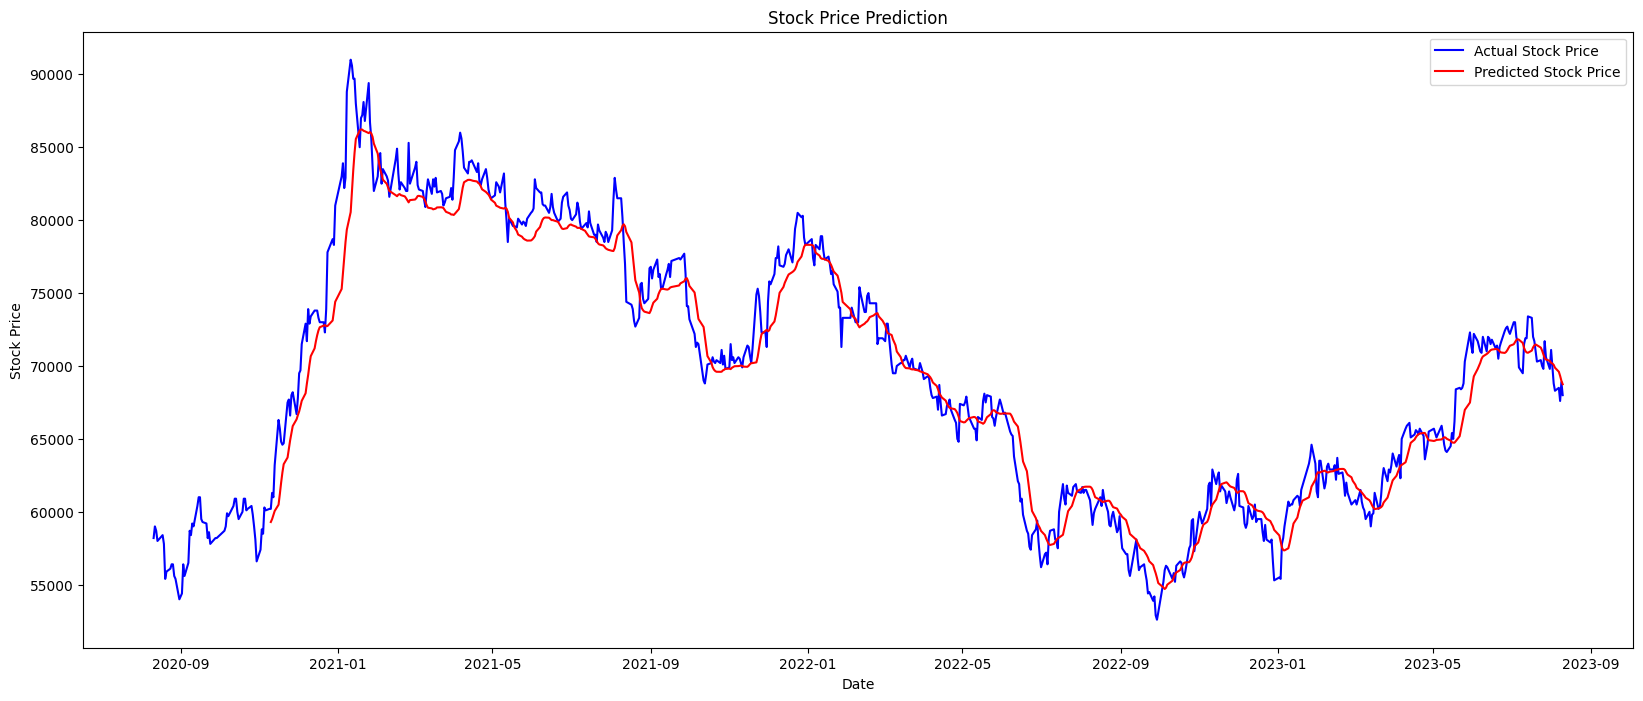

In [14]:
import matplotlib.pyplot as plt

# 먼저, 전체 데이터셋에 대한 모델의 예측 값을 구합니다.
predicted_values = model.predict(X)
predicted_values = scaler.inverse_transform(predicted_values)

# 원본 주가 데이터와 예측 결과를 그래프로 그립니다.
plt.figure(figsize=(20, 8))
plt.plot(data.index, data['Close'], color='blue', label='Actual Stock Price')
plt.plot(data.index[60:], predicted_values, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
19/19 [==============================] - 3s 7ms/step - loss: 0.0584
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0118
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0047
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 8/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 9/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 10/10
1/1 [==============================] - 0s 20ms/step


<ipython-input-2-51344a29c014>:53: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predicted_dates = pd.date_range(start=features.index[-1], periods=future_days+1, closed='right')


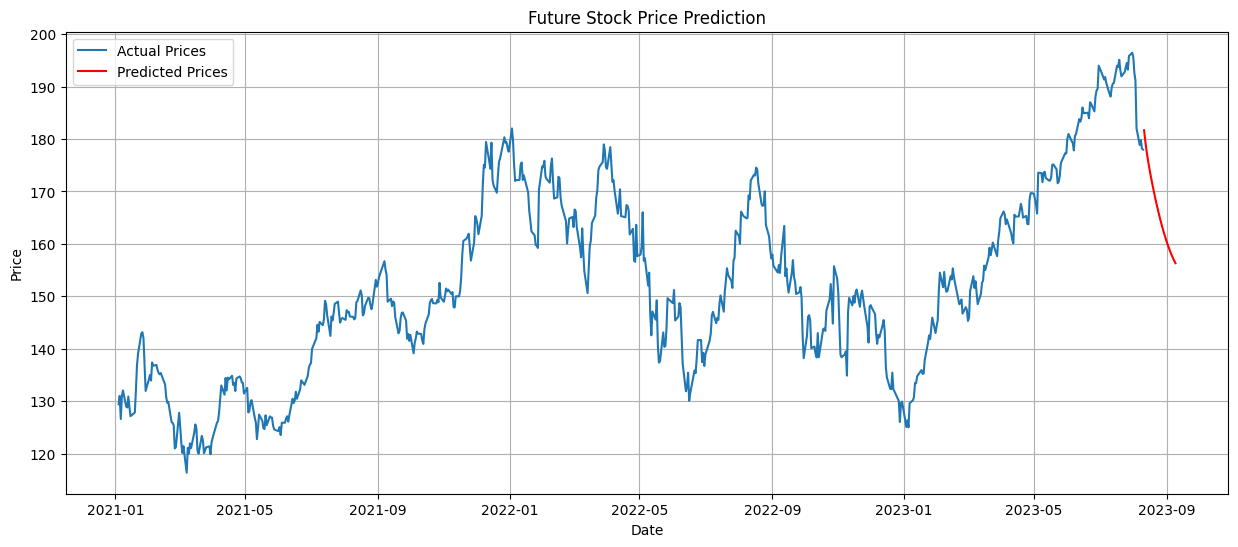

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Yahoo Finance로부터 데이터 가져오기
def get_yahoo_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    return df

data = get_yahoo_data('AAPL', '2021-01-01', '2023-08-11')

# 데이터 전처리
features = data[['Close']]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(features)

X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# 모델 구성 및 학습
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# 미래 주가 예측
future_days = 30
predictions = []
current_data = scaled_data[-60:].tolist()

for _ in range(future_days):
    predicted_value = model.predict(np.array(current_data).reshape(1, 60, 1))
    current_data.append(predicted_value[0])
    current_data = current_data[1:]
    predictions.append(predicted_value[0])

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
features.index = pd.to_datetime(features.index)
features.index = features.index.tz_localize(None)

# 그래프 그리기
predicted_dates = pd.date_range(start=features.index[-1], periods=future_days+1, closed='right')
predicted_dates = predicted_dates.tz_localize(None)

plt.figure(figsize=(15, 6))
plt.plot(features.index, features['Close'], label='Actual Prices')
plt.plot(predicted_dates, predictions, color='red', label='Predicted Prices')
plt.title('Future Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save('stock_predictor_model.h5')
